<a href="https://colab.research.google.com/github/sanahussain47/Analysis/blob/main/Gender_Participation_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Title: Gender-Based Chat Participation Analysis using Chi-Square Test

## Objective:
This notebook investigates whether there is a statistically significant difference between male and female student participation in the chat during the bootcamp.

---

## Step 1: Import Required Libraries
We need pandas for data handling, matplotlib and seaborn for visualization, and scipy for statistical testing.


In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency


In [2]:

# Step 2: Input the Observed Data
# We create a contingency table with:
# - Rows = Gender
# - Columns = Participated and Did Not Participate

# Based on cleaned and deduplicated participant lists:
male_participants = 42
female_participants = 23

male_actual = 61
female_actual = 36

# Calculate the number of students who did NOT participate
male_non_participants = male_actual - male_participants
female_non_participants = female_actual - female_participants

# Create the contingency table
contingency_table = pd.DataFrame({
    "Participated": [male_participants, female_participants],
    "Did_Not_Participate": [male_non_participants, female_non_participants]
}, index=["Male", "Female"])

contingency_table


,Participated,Did_Not_Participate
Male,42,19
Female,23,13


In [3]:

# Step 3: Perform Chi-Square Test
# This test checks if there's a statistically significant difference between male and female participation.

chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the expected counts
expected_df = pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns)
expected_df


,Participated,Did_Not_Participate
Male,40.876289,20.123711
Female,24.123711,11.876289


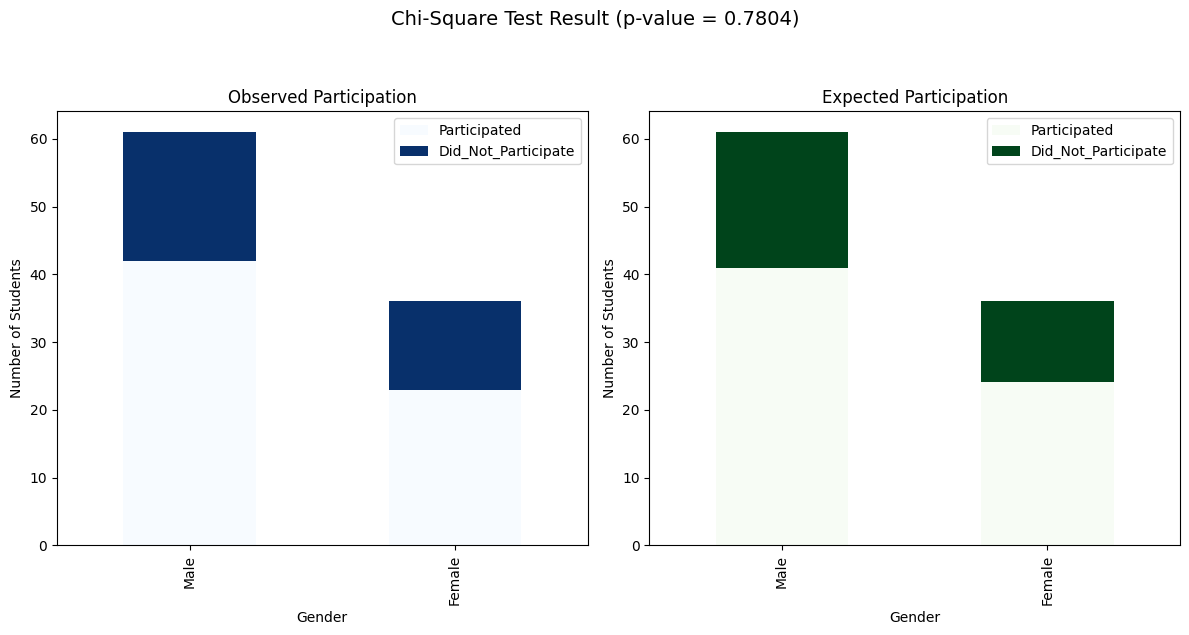

In [4]:

# Step 4: Visualize Observed vs Expected Participation

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

contingency_table.plot(kind="bar", stacked=True, ax=axes[0], colormap="Blues", title="Observed Participation")
expected_df.plot(kind="bar", stacked=True, ax=axes[1], colormap="Greens", title="Expected Participation")

for ax in axes:
    ax.set_ylabel("Number of Students")
    ax.set_xlabel("Gender")
    ax.legend(loc='upper right')

plt.suptitle(f"Chi-Square Test Result (p-value = {p:.4f})", fontsize=14, y=1.05)
plt.tight_layout()
plt.show()


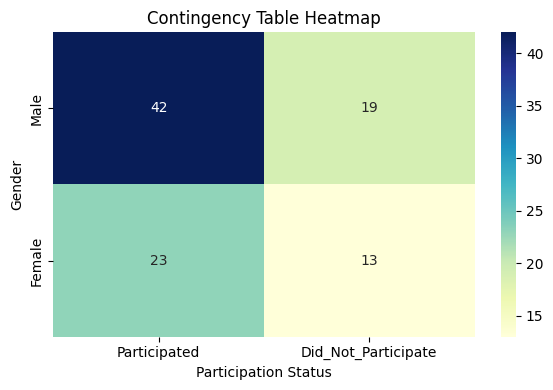

In [5]:

# Step 5: Heatmap of the Contingency Table
# This shows the actual participation numbers with color intensity.

plt.figure(figsize=(6, 4))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Contingency Table Heatmap")
plt.xlabel("Participation Status")
plt.ylabel("Gender")
plt.tight_layout()
plt.show()


In [6]:

# Step 6: Conclusion

print("Chi-Square Statistic:", round(chi2, 3))
print("p-value:", round(p, 4))

if p < 0.05:
    print("Conclusion: There is a significant difference in participation between males and females.")
else:
    print("Conclusion: There is NO significant difference in participation between males and females.")


Chi-Square Statistic: 0.078
p-value: 0.7804
Conclusion: There is NO significant difference in participation between males and females.
